

# Project: FBI GUN DATA

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will be working on the " NICS data" from the National Instant Criminal Background Check System  
> 
> The Questions i wish to answer with this data set is as listed below
>
>-Which states have  the highest growth in gun registrations?
>
>-What is the overall trend of gun purchases?
>
>-which location in the U.S will be the best location to set up a Gun Shop Business?

In [2]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> 
### General Properties

In [3]:
#loading data
df = pd.read_csv('gun_data.csv')


In [4]:
#analysing the data to view  the the fist 5 rows
df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
#analysing the data to view  the the last 5 rows
df.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107



# Below is the column definition

• **Permit**- application for gun permit/gun registration 

• **permit recheck**- check for a validity permit

• **Handgun**-any firearm which has a short stock and is designed to be held and fired by the use of a single hand

• **Long Gun**-a weapon designed and intended to be fired from the shoulder

• **Other**—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns)

• **multiple**- denotes a background check where more than one type of firearm is associated to a single background check

• **admin**- denotes the administrative checks that are for other authorized uses of the NICS

• **Pre-Pawn**- background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm

• **Redemption**— background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop

• **Returned**— background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited

• **Rentals**—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm when the firearm is loaned or rented for use off the premises of the business

• **Private Sale**—background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL

• **Return to Seller**-background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL


In [6]:
# the ouput shows the number of rows and columns in the dataset
df.shape

(12485, 27)

with 12485 rows and 27 rows


In [7]:
#i am checking to veryfy the datatypes of the each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

the above data types are ok to work with

In [8]:
# i am checking for null data
df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [9]:
df.duplicated().sum()

0

The output above shows that there  are no duplicates

In [10]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


From the above codes our main focus on our analysis will be on the 5 major colomns, 

-month

-state

-permit

-hand gun

-long_gun

so we will drop the remaining columns

Then i will remove null values if any remain

i will include another column called 'total'

### Data Cleaning 

In [11]:
#lets verify the colums and drop the unwated ones
df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [12]:
# removing unwanted columns
df.drop(['permit_recheck','other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],axis=1,inplace=True)

In [13]:
df.head()

,month,state,permit,handgun,long_gun
0,2017-09,Alabama,16717.0,5734.0,6320.0
1,2017-09,Alaska,209.0,2320.0,2930.0
2,2017-09,Arizona,5069.0,11063.0,7946.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0
4,2017-09,California,57839.0,37165.0,24581.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   permit    12461 non-null  float64
 3   handgun   12465 non-null  float64
 4   long_gun  12466 non-null  float64
dtypes: float64(3), object(2)
memory usage: 487.8+ KB


In [15]:
df.describe()

,permit,handgun,long_gun
count,12461.000000,12465.000000,12466.000000
mean,6413.629404,5940.881107,7810.847585
std,23752.338269,8618.584060,9309.846140
min,0.000000,0.000000,0.000000
25%,0.000000,865.000000,2078.250000
50%,518.000000,3059.000000,5122.000000
75%,4272.000000,7280.000000,10380.750000
max,522188.000000,107224.000000,108058.000000


In [16]:
df.isnull().sum()

month        0
state        0
permit      24
handgun     20
long_gun    19
dtype: int64

In [17]:
# removing null values,
# i removed null values because replacing them with the mean might give me a wrong output for my results
df.dropna(inplace=True)

In [18]:
df.shape

(12461, 5)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12461 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12461 non-null  object 
 1   state     12461 non-null  object 
 2   permit    12461 non-null  float64
 3   handgun   12461 non-null  float64
 4   long_gun  12461 non-null  float64
dtypes: float64(3), object(2)
memory usage: 584.1+ KB


In [20]:
# creating a new column with the total of all the 'permit','handgun',and 'long_gun'
df['total']=df['permit']+df['handgun']+df['long_gun']

In [21]:
df.head()

,month,state,permit,handgun,long_gun,total
0,2017-09,Alabama,16717.0,5734.0,6320.0,28771.0
1,2017-09,Alaska,209.0,2320.0,2930.0,5459.0
2,2017-09,Arizona,5069.0,11063.0,7946.0,24078.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0,13345.0
4,2017-09,California,57839.0,37165.0,24581.0,119585.0


In [22]:
df.describe()

,permit,handgun,long_gun,total
count,12461.000000,12461.000000,12461.000000,12461.000000
mean,6413.629404,5941.751465,7812.227189,20167.608057
std,23752.338269,8619.636023,9310.841371,31186.085657
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,865.000000,2079.000000,4334.000000
50%,518.000000,3059.000000,5122.000000,11261.000000
75%,4272.000000,7285.000000,10380.000000,23508.000000
max,522188.000000,107224.000000,108058.000000,536813.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which states have  the highest growth in gun registrations? )

In [23]:
# for analysing the data for the the first question we will be considering the "permit " column whis signifies
# the number of gun registration

# we will group the data by the state and the permit column
#a bar chart will help us see clearly the result we want

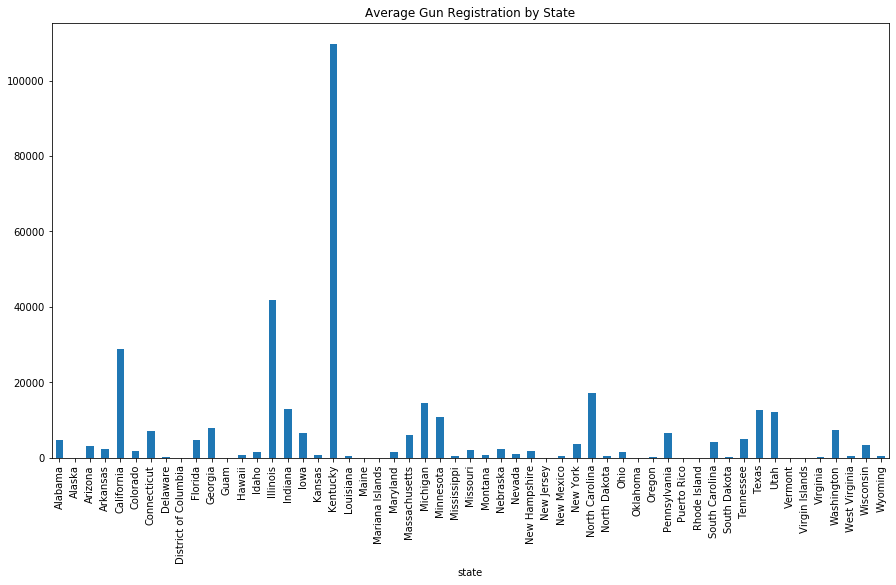

In [24]:
df.groupby('state').permit.mean().plot(kind='bar',title='Average Gun Registration by State', figsize= (15,8));

# RESULT:
# From the graph above we see that the state of "Kentucky" has the highest gun  registration

### Research Question 2  (What is the overall trend of gun purchases?)

In [25]:
# TO clearly answer question 2 i used a line graph as it will clearly
# show the trend of gun purchases 

In [26]:
#df.groupby('month').mean()['total'].plot(kind='hist')

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


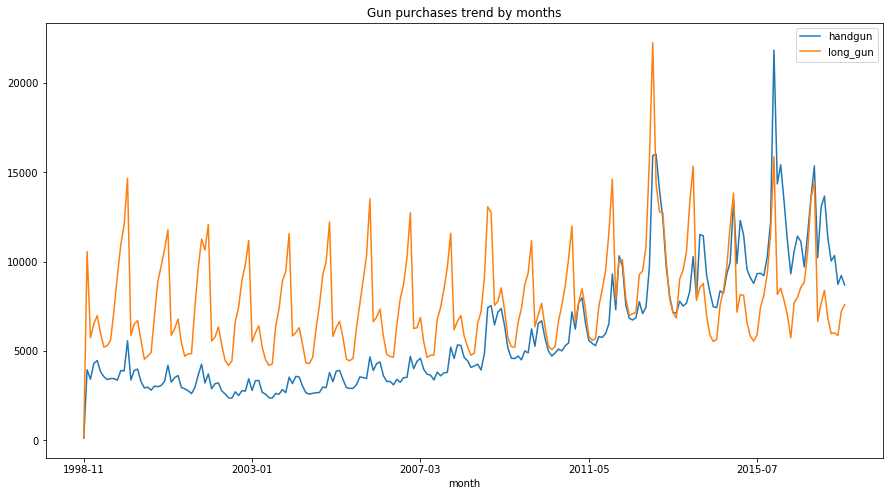

In [27]:
df.groupby(['month'])['handgun','long_gun'].mean().plot(kind='line',title= 'Gun purchases trend by months',figsize= (15,8));

## RESULT:
# The trend looks to be increasing yearly both for sales of handguns and long guns

### Research Question 3  (which location in the U.S will be the best location to set up a Gun Shop Business)

In [28]:
#lets plot the two different gun types and see which state has the highest ccount

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


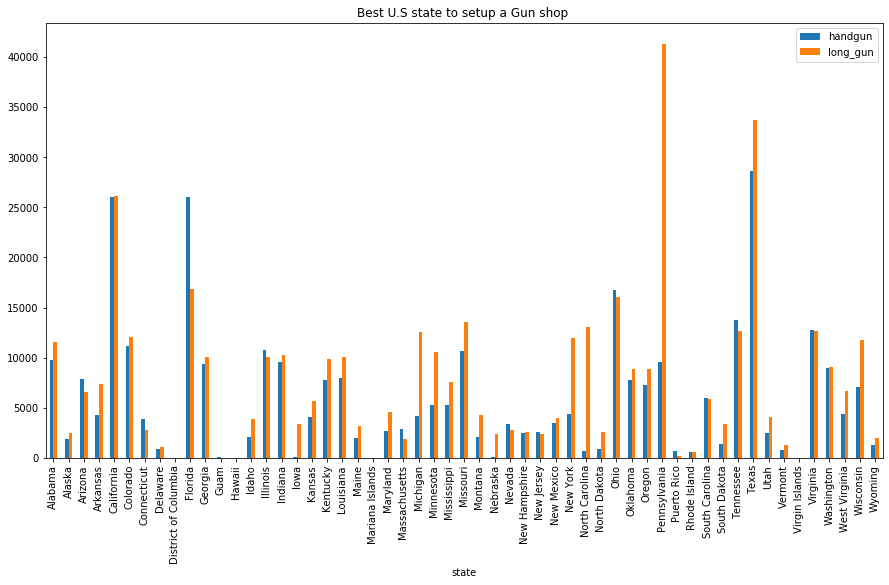

In [29]:
df.groupby(['state'])['handgun','long_gun'].mean().plot(kind='bar',title = 'Best U.S state to setup a Gun shop ' ,figsize= (15,8));

# Texas seems to be the best place to set up a gun shop, as the sales looks equal for both long and hand guns but any long gun sales  will trive better in Pennsylvania 

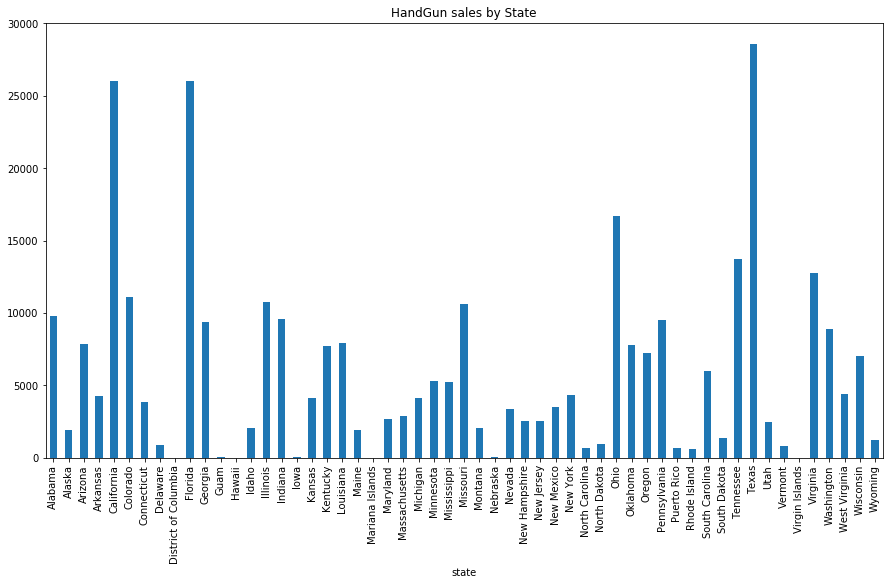

In [30]:
# ploting the handgun count against the state using a bar chart
df.groupby('state').handgun.mean().plot(kind='bar',title= 'HandGun sales by State',figsize= (15,8));

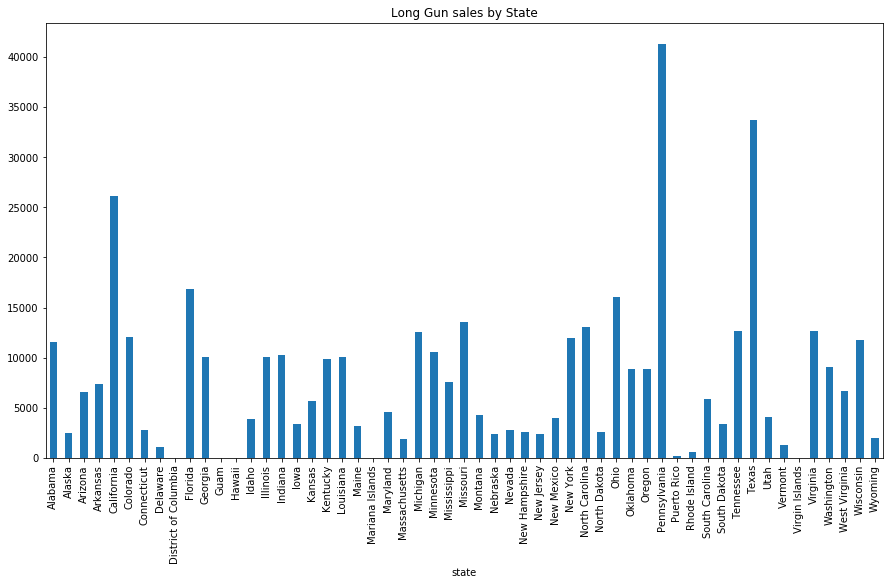

In [31]:
# plotting the long gun against the state
df.groupby('state').long_gun.mean().plot(kind='bar',title= 'Long Gun sales by State',figsize= (15,8));

<a id='conclusions'></a>
## Conclusions

> The gun registration trend has been increasing over the years which will also lead to an increase in gun sales, as more people aquire the permit
>
> **limitations**
>
> 1,For this eploration i was  not able to compare my findings in this gun data with the census data to see if there was any correlation between the state population and the gun data,i believe that it would have given more clarity and more support to the results from this exploration
>
>2,Deciding on the columns to use was a bit difficult initial until i understood exacly what each column meant from the git hub documentation which linked me to this file https://www.fbi.gov/file-repository/nics_firearm_checks_-_month_year_by_state_type.pdf/view 


In [32]:
df.shape

(12461, 6)

In [33]:
gun_state=df.groupby('state').mean()

In [34]:
gun_state.head()

,permit,handgun,long_gun,total
state,,,,
Alabama,4614.277533,9788.709251,11568.409692,25971.396476
Alaska,58.819383,1914.546256,2520.590308,4493.955947
Arizona,3129.995595,7847.876652,6523.180617,17501.052863
Arkansas,2237.669604,4253.674009,7327.118943,13818.462555
California,28768.911894,26039.118943,26153.171806,80961.202643


In [36]:
gun_state.reset_index(inplace=True)

In [37]:
gun_state.head()

,state,permit,handgun,long_gun,total
0,Alabama,4614.277533,9788.709251,11568.409692,25971.396476
1,Alaska,58.819383,1914.546256,2520.590308,4493.955947
2,Arizona,3129.995595,7847.876652,6523.180617,17501.052863
3,Arkansas,2237.669604,4253.674009,7327.118943,13818.462555
4,California,28768.911894,26039.118943,26153.171806,80961.202643


In [38]:
gun_state['state']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District of Columbia
9                  Florida
10                 Georgia
11                    Guam
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21         Mariana Islands
22                Maryland
23           Massachusetts
24                Michigan
25               Minnesota
26             Mississippi
27                Missouri
28                 Montana
29                Nebraska
30                  Nevada
31           New Hampshire
32              New Jersey
33              New Mexico
34                New York
35          North Carolina
36            North Dakota
3

In [40]:
cen =pd.read_csv('clean_pop.csv')

In [41]:
cen.shape

(50, 2)

In [42]:
cen.head()

,state_pop,pop_2016
0,Alabama,4863300.0
1,Alaska,741894.0
2,Arizona,6931071.0
3,Arkansas,2988248.0
4,California,39250017.0


C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


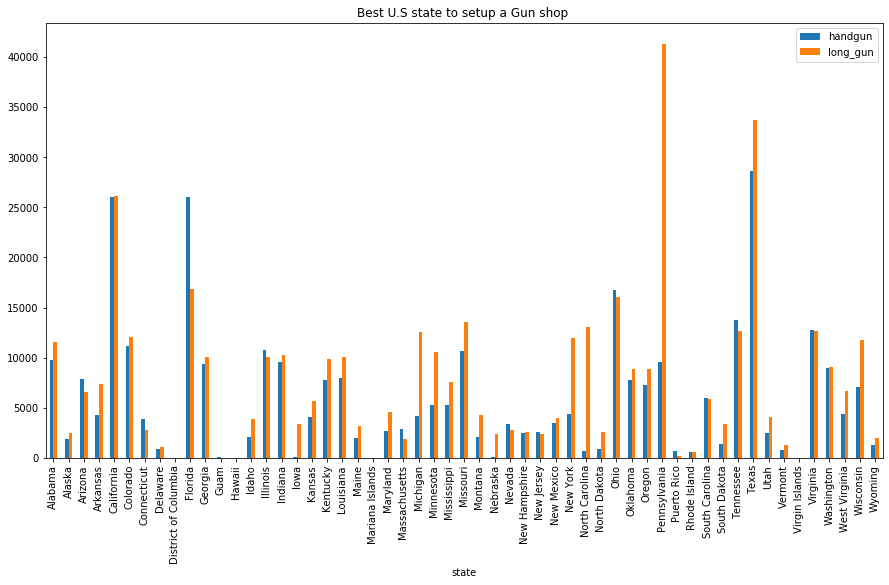

In [63]:
#cen.plot(x='state_pop',y='pop_2016',kind='bar',figsize=(15,8))
ax=df.groupby(['state'])['handgun','long_gun'].mean().plot(kind='bar',title = 'Best U.S state to setup a Gun shop ' ,figsize= (15,8));

In [70]:
cen.plot(x='state_pop',y='pop_2016',kind='bar',figsize=(15,8),ax=ax)

ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat